In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [5]:
# base directory
original_dataset_dir = 'dogs-vs-cats/train'
base_dir = 'cat_dog_small'
#os.mkdir(base_dir)
# training testing directory
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)
# Directory with our validation cat pictures
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
!ls

In [6]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
!pwd

/home/ranap/DeepLearning


In [9]:
from keras import layers
from keras import models

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
    
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 21s 210ms/step - loss: 0.6910 - acc: 0.5290 - val_loss: 0.6725 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6595 - acc: 0.6035 - val_loss: 0.6501 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6167 - acc: 0.6590 - val_loss: 0.6443 - val_acc: 0.6130
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5764 - acc: 0.6900 - val_loss: 0.6248 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5363 - acc: 0.7395 - val_loss: 0.5878 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5106 - acc: 0.7555 - val_loss: 0.7039 - val_acc: 0.6360
Epoch 7/30
100/100 [==============================] - 12s 122ms/step - loss: 0.4838 - acc: 0.7585 - val_loss: 0.6539 - val_acc: 0.6520
Epoch 8

In [16]:
model.save('cats_and_dogs_small_1.h5')

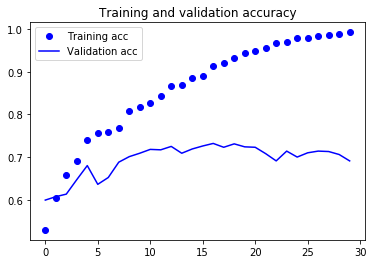

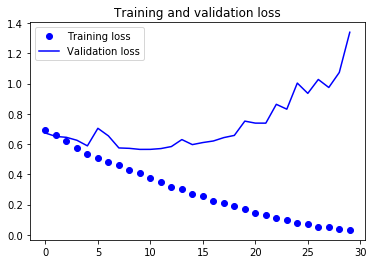

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

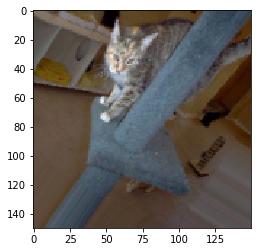

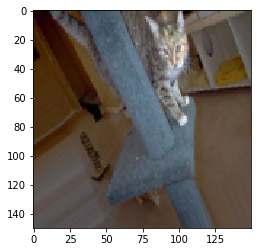

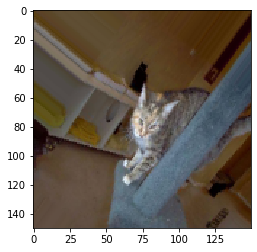

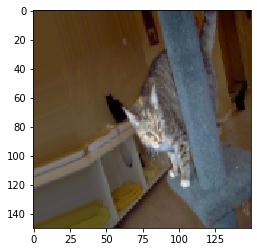

In [20]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 318ms/step - loss: 0.7028 - acc: 0.6803 - val_loss: 0.5450 - val_acc: 0.7227
Epoch 2/100
100/100 [==============================] - 28s 281ms/step - loss: 0.5657 - acc: 0.7137 - val_loss: 0.5790 - val_acc: 0.6959
Epoch 3/100
100/100 [==============================] - 29s 290ms/step - loss: 0.5488 - acc: 0.7159 - val_loss: 0.5323 - val_acc: 0.7367
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.5346 - acc: 0.7269 - val_loss: 0.5266 - val_acc: 0.7358
Epoch 5/100
100/100 [==============================] - 27s 273ms/step - loss: 0.5164 - acc: 0.7428 - val_loss: 0.4778 - val_acc: 0.7766
Epoch 6/100
100/100 [==============================] - 29s 295ms/step - loss: 0.5236 - acc: 0.7359 - val_loss: 0.5060 - val_acc: 0.7648
Epoch 7/100
100/100 [==============================] - 28s 278ms/step - loss: 0.5012 - acc: 0.7594 -

100/100 [==============================] - 28s 284ms/step - loss: 0.3613 - acc: 0.8331 - val_loss: 0.4540 - val_acc: 0.8008
Epoch 61/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3495 - acc: 0.8503 - val_loss: 0.4221 - val_acc: 0.8312
Epoch 62/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3666 - acc: 0.8350 - val_loss: 0.4232 - val_acc: 0.8255
Epoch 63/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3423 - acc: 0.8522 - val_loss: 0.4672 - val_acc: 0.8196
Epoch 64/100
100/100 [==============================] - 30s 303ms/step - loss: 0.3528 - acc: 0.8459 - val_loss: 0.4157 - val_acc: 0.8280
Epoch 65/100
100/100 [==============================] - 28s 283ms/step - loss: 0.3251 - acc: 0.8572 - val_loss: 0.4863 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 28s 276ms/step - loss: 0.3589 - acc: 0.8416 - val_loss: 0.4305 - val_acc: 0.8312
Epoch 67/100
100/100 [==============================] 

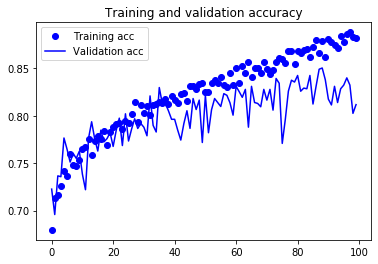

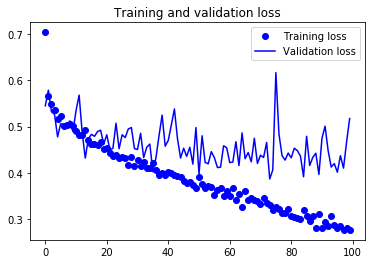

In [22]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

